In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.data

(512, 512)


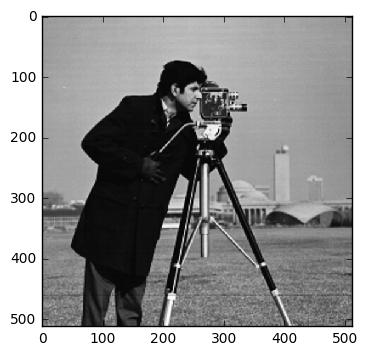

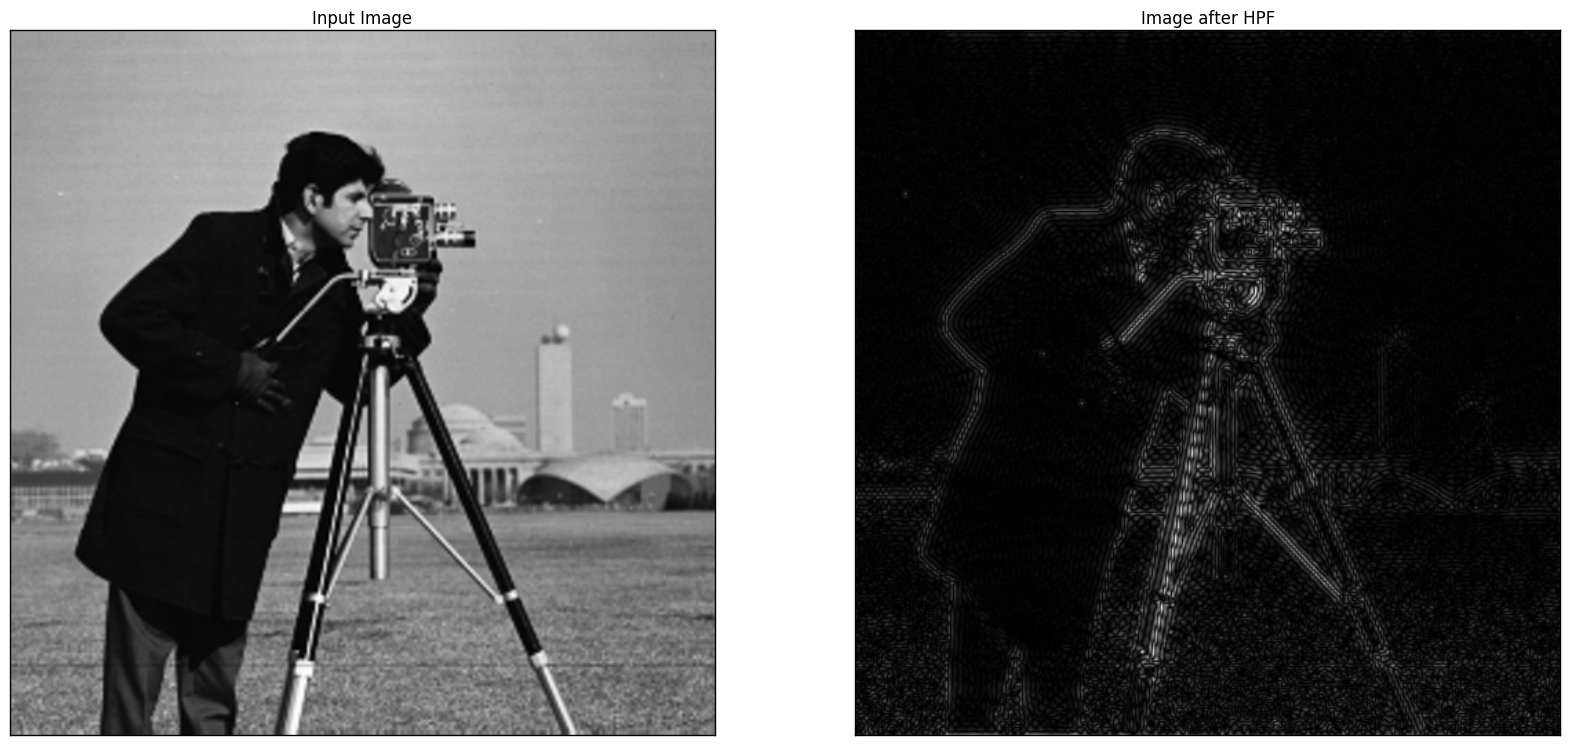

In [3]:
c = skimage.data.camera()
print c.shape
plt.imshow(c, cmap='gray', interpolation='nearest');

# fft to convert the image to freq domain 
img = c
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# Low Pass Filter (LPF)
row, col = np.ogrid[:rows, :cols]
outer_disk_mask = ((row - crow)**2 + (col - ccol)**2 < (rows / 8)**2)
fshift[outer_disk_mask] = 0


# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.figure(figsize=(20,25))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])


plt.show()

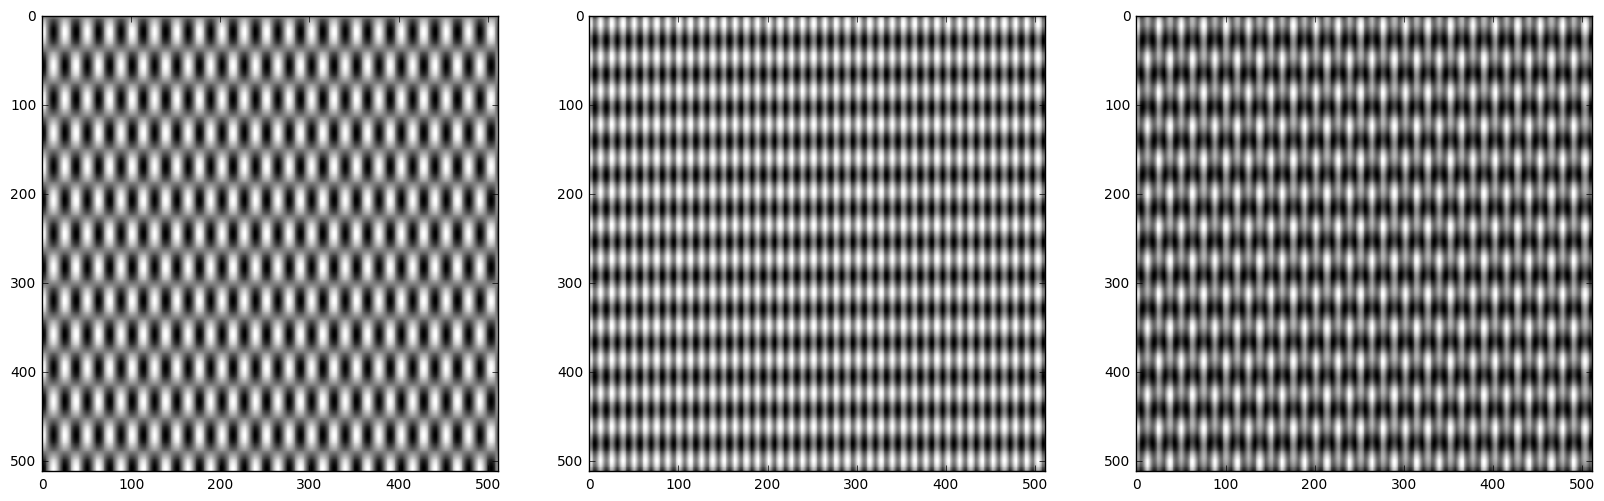

In [4]:
row, col = np.ogrid[:512, :512]
o = np.sin(row / 12.0) * np.cos(col / 4.0)
p = np.sin(row / 6.0) + np.cos(col / 2.0)
q = 0.5 * (o + p)

plt.figure(figsize=(20,25))
plt.subplot(131), plt.imshow(o, cmap = 'gray', interpolation='nearest');
plt.subplot(132), plt.imshow(p, cmap = 'gray', interpolation='nearest');
plt.subplot(133), plt.imshow(q, cmap = 'gray', interpolation='nearest');